In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
from pandas.plotting import parallel_coordinates
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA

In [2]:
from sklearn.metrics import confusion_matrix
import math

def metric(pred,true):
    
    tn, fp, fn, tp = confusion_matrix(pred,true).ravel()
    
    acc=(tp+tn)*1.0/(tp+fp+tn+fn)
    
    sen=(1.0*tp)/(tp+fn)

    spc=(1.0*tn)/(tn+fp)
    
    
    F1_score = 2*tp / (2*tp + fp + fn)
    
    D_index = math.log2(1+acc) + math.log2(1 + ( (sen+spc) /2 ) )
    
    res=[]
    res.append(acc)
    res.append(sen)
    res.append(spc)
    res.append(F1_score)
    res.append(D_index)
    
    print("\n Metrics ： Accuracy  Sensitivity  Specificity F1_Score  D_Index ): \n")
    print("{}".format(res))


In [3]:
CR_df = pd.read_csv('credit_data_simulate.csv')
CR_df = CR_df.dropna()
CR_df.head(1)

,Working capital / Total Assets (WC_TA),Retained Earnings / Total Assets (RE_TA),Earnings Before Interests and Taxes / Total Assets (EBIT_TA),Market Value of Equity / Book Value of Total Debt (MVE_BVTD),Sales / Total Assets (S_TA),Industry sector labels from 1-12,Credit status
0,0.121,0.413,0.057,3.647,0.466,12.0,1.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

data = CR_df
label = CR_df['Credit status']
X_train, X_test, Y_train, Y_test = train_test_split(np.array(data), np.array(label), test_size=0.20, random_state=42)


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from numpy.linalg import norm
from numpy import dot

def cosine(X, Y):
    Y = Y.T
    r = X.dot(Y)/(np.linalg.norm(X)*np.linalg.norm(Y))
    return r

def tanH(X,Y):
    Y= Y.T
    return np.tanh(X.dot(Y))

def custom(X,Y):
    Y= Y.T
    return X.dot(Y)*np.tanh(X.dot(Y))


k_fold_ = 10

#
    
kernel = [ 'rbf','linear','poly','sigmoid',cosine,custom,tanH ]

param = {'C': [10,1,.1,.001],}

rs = []

for i in range(0,len(kernel)):
    
    sv = SVC(kernel=kernel[i])
    clf = GridSearchCV(sv,param,cv = k_fold_)
    clf.fit(X_train, Y_train)
    rs.append(clf)

In [116]:
rs[6].best_estimator_

SVC(C=10, kernel=<function tanH at 0x00000295B2B1AAF0>)

In [90]:
cl = rs[1].best_estimator_
len(cl.support_vectors_)

5

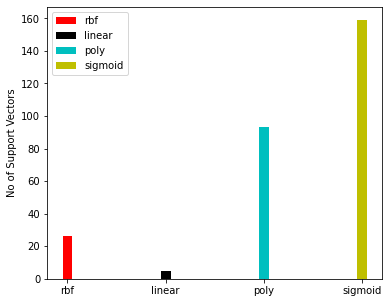

In [91]:
import matplotlib.pyplot as plt 
    
fig=plt.figure(figsize=(6,5))

bar1 = plt.bar("rbf", len(rs[0].best_estimator_.support_vectors_), color= 'r',width = .1)
bar2 = plt.bar("linear", len(rs[1].best_estimator_.support_vectors_), color= 'k',width = .1)
bar3 = plt.bar("poly", len(rs[2].best_estimator_.support_vectors_), color= 'c',width = .1)
bar4 = plt.bar("sigmoid", len(rs[3].best_estimator_.support_vectors_), color= 'y',width = .1)
    
    
plt.legend( (bar1,bar2,bar3,bar4), ('rbf','linear','poly','sigmoid'))
plt.ylabel("No of Support Vectors")
plt.show()


In [92]:
from sklearn.metrics import accuracy_score
print(" RBF : \n")
metric(rs[0].best_estimator_.predict(X_test), Y_test)

 RBF : 


 Metrics ： Accuracy  Sensitivity  Specificity F1_Score  D_Index ): 

[1.0, 1.0, 1.0, 1.0, 2.0]


In [42]:
print(" Linear : \n")
metric(rs[1].best_estimator_.predict(X_test), Y_test)

 Linear : 


 Metrics ： Accuracy  Sensitivity  Specificity F1_Score  D_Index ): 

[1.0, 1.0, 1.0, 1.0, 2.0]


In [43]:
print(" Poly : \n")
metric(rs[2].best_estimator_.predict(X_test), Y_test)

 Poly : 


 Metrics ： Accuracy  Sensitivity  Specificity F1_Score  D_Index ): 

[0.9700598802395209, 0.9684542586750788, 1.0, 0.9839743589743589, 1.966816658001071]


In [44]:
print(" Sigmoid : \n")
metric(rs[3].best_estimator_.predict(X_test), Y_test)

 Sigmoid : 


 Metrics ： Accuracy  Sensitivity  Specificity F1_Score  D_Index ): 

[0.9401197604790419, 0.9388379204892966, 1.0, 0.9684542586750788, 1.933915763027107]


In [93]:
print(" Cosine : \n")
metric(rs[4].best_estimator_.predict(X_test), Y_test)

 Cosine : 


 Metrics ： Accuracy  Sensitivity  Specificity F1_Score  D_Index ): 

[0.9191616766467066, 0.9191616766467066, nan, 0.9578783151326054, nan]


C:\Users\chsha\AppData\Local\Temp/ipykernel_11472/4082436360.py:12: RuntimeWarning: invalid value encountered in double_scalars
  spc=(1.0*tn)/(tn+fp)


In [95]:
print(" TanH : \n")
metric(rs[6].best_estimator_.predict(X_test), Y_test)

 TanH : 


 Metrics ： Accuracy  Sensitivity  Specificity F1_Score  D_Index ): 

[0.9191616766467066, 0.9191616766467066, nan, 0.9578783151326054, nan]


C:\Users\chsha\AppData\Local\Temp/ipykernel_11472/4082436360.py:12: RuntimeWarning: invalid value encountered in double_scalars
  spc=(1.0*tn)/(tn+fp)


In [96]:
print(" Custom Kernel : \n")
metric(rs[5].best_estimator_.predict(X_test), Y_test)

 Custom Kernel : 


 Metrics ： Accuracy  Sensitivity  Specificity F1_Score  D_Index ): 

[1.0, 1.0, 1.0, 1.0, 2.0]


In [7]:
norm = StandardScaler().fit_transform(X_train)
pca = PCA(n_components = 2)
Xt = pca.fit_transform(norm)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from numpy.linalg import norm
from numpy import dot



k_fold_ = 10

 
kernel =  [ 'rbf','linear','poly','sigmoid',cosine,custom,tanH ]

rs = []

param = {'C': [10,1,.1,.001],}


for i in range(0,len(kernel)):
    
    sv = SVC(kernel=kernel[i])
    clf = GridSearchCV(sv,param,cv = k_fold_)
    clf.fit(Xt, Y_train)
    rs.append(clf)

In [99]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

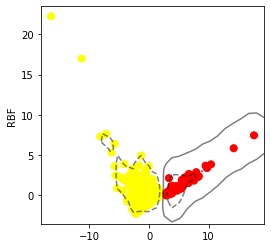

In [100]:
X, y = Xt, Y_train

fig = plt.figure(figsize=(4,4))

model = rs[0].best_estimator_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
plt.ylabel("RBF")
plt.show()

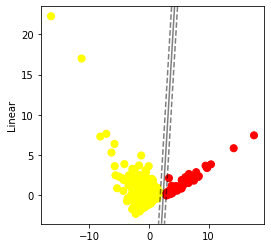

In [38]:
X, y = Xt, Y_train

fig = plt.figure(figsize=(4,4))

model = rs[1].best_estimator_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
plt.ylabel("Linear")
plt.show()

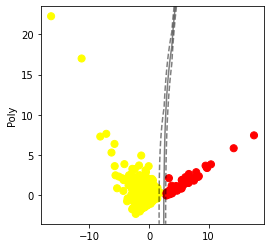

In [39]:
X, y = Xt, Y_train

fig = plt.figure(figsize=(4,4))

model = rs[2].best_estimator_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
plt.ylabel("Poly")
plt.show()

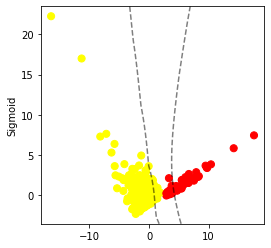

In [41]:
X, y = Xt, Y_train

fig = plt.figure(figsize=(4,4))

model = rs[3].best_estimator_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
plt.ylabel("Sigmoid")
plt.show()

IndexError: index 0 is out of bounds for axis 1 with size 0

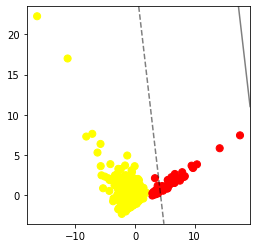

In [104]:
X, y = Xt, Y_train

fig = plt.figure(figsize=(4,4))

model = rs[4].best_estimator_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
plt.ylabel("Cosine")
plt.show()

IndexError: index 0 is out of bounds for axis 1 with size 0

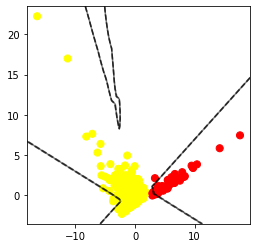

In [119]:
X, y = Xt, Y_train

fig = plt.figure(figsize=(4,4))

model = rs[5].best_estimator_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
plt.ylabel("Cosine")
plt.show()

NameError: name 'plot_svc_decision_function' is not defined

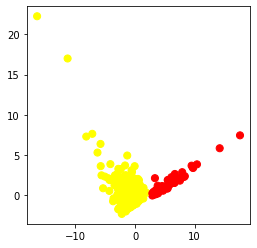

In [9]:
X, y = Xt, Y_train

fig = plt.figure(figsize=(4,4))

model = rs[4].best_estimator_
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, lw=1, facecolors='none');
plt.ylabel("Cosine")
plt.show()


 check the following classication measures： accuracy, sen, spec,ppr,npr,F1_Score

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


C:\Users\chsha\AppData\Local\Temp/ipykernel_17220/1642563988.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  t_idx=(predicted_label==true_label) # truely predicted


In [12]:
h = 0.02 
X = Xt
Y = Y_train
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rs[6].best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Sigmoid kernel")
plt.axis("tight")
plt.show()

MemoryError: Unable to allocate 23.8 GiB for an array with shape (2393529, 1336) and data type float64

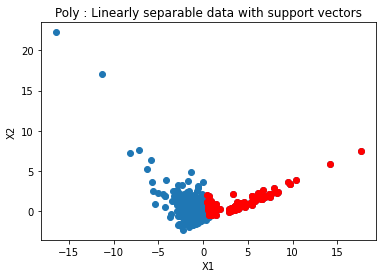

In [135]:
support_vectors =rs[3].best_estimator_.support_vectors_

# Visualize support vectors
plt.scatter(Xt[:,0], Xt[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Poly : Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()